In [1]:
import numpy as np
import dolfin as dl
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
def conforming_rectangle(min_point, max_point, grid_zero_point, grid_h):
    # https://github.com/NickAlger/helper_functions/blob/master/conforming_rectangle.ipynb
    h = grid_h
    p = grid_zero_point
    
    min_point_conforming = np.floor((min_point - p) / h) * h + p
    max_point_conforming = np.ceil((max_point - p) / h) * h + p
    
    return min_point_conforming, max_point_conforming

# Test:

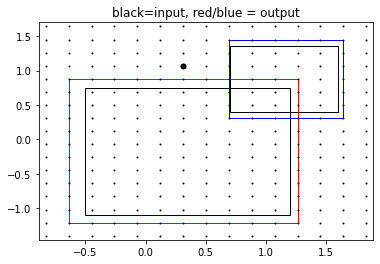

In [3]:
min1 = np.array([-0.5, -1.1])
max1 = np.array([1.2, 0.75])

min2 = np.array([0.7, 0.4])
max2 = np.array([1.6, 1.35])

p = np.array([0.312, 1.07])

h = 0.19

min1c, max1c = conforming_rectangle(min1, max1, p, h)
min2c, max2c = conforming_rectangle(min2, max2, p, h)


def make_rect_patch(minpt, maxpt, edgecolor='k'):
    delta = maxpt - minpt
    return patches.Rectangle(minpt, delta[0], delta[1], linewidth=1, edgecolor=edgecolor, facecolor='none')

r1 = make_rect_patch(min1, max1, edgecolor='k')
r2 = make_rect_patch(min2, max2, edgecolor='k')
r1c = make_rect_patch(min1c, max1c, edgecolor='r')
r2c = make_rect_patch(min2c, max2c, edgecolor='b')

buf = 0.25
xmin = np.min([min1c[0], min2c[0], p[0]]) - buf
ymin = np.min([min1c[1], min2c[1], p[1]]) - buf
xmax = np.max([max1c[0], max2c[0], p[0]]) + buf
ymax = np.max([max1c[1], max2c[1], p[1]]) + buf

xx = np.arange(-25, 25) * h + p[0]
yy = np.arange(-25, 25) * h + p[1]

XX, YY = np.meshgrid(xx, yy)

plt.figure()

# Add the patch to the Axes
plt.gca().add_patch(r1)
plt.gca().add_patch(r2)
plt.gca().add_patch(r1c)
plt.gca().add_patch(r2c)
plt.plot(p[0], p[1], '.k', markersize=10)

plt.plot(XX[:], YY[:], '.k', markersize=2)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.title('black=input, red/blue = output')

plt.show()